In [ ]:
# Installs all the necessary packages for the project
%pip install pandas pandas-ta numpy matplotlib statsmodels pandas_datareader datetime yfinance scikit-learn PyPortfolioOpt
%pip install --upgrade certifi

In [9]:
# Imports all the necessary packages for the project and fixes ssl error
import ssl
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta as ta
import warnings
warnings.filterwarnings('ignore')
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
# Get SP500 data    
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')
symbols_list = sp500['Symbol'].unique().tolist()

end_date = dt.datetime.now().strftime('%Y-%m-%d')
start_date = (pd.to_datetime(end_date) - pd.DateOffset(years=10)).strftime('%Y-%m-%d')

df = yf.download(tickers=symbols_list, start=start_date, end=end_date).stack()

df.index.names = ['Date', 'Symbol']

df

[*********************100%%**********************]  503 of 503 completed


Adj Close       Close        High         Low        Open  \
Date       Symbol                                                               
2019-01-28 A        70.695351   73.269997   73.279999   72.410004   72.760002   
           AAL      35.988071   36.570000   36.619999   34.500000   34.529999   
           AAPL     37.504616   39.075001   39.082500   38.415001   38.947498   
           ABBV     61.238453   77.139999   80.099998   76.680000   80.000000   
           ABT      63.482128   69.050003   70.629997   68.889999   70.519997   
...                       ...         ...         ...         ...         ...   
2024-01-25 YUM     130.220001  130.220001  130.309998  128.539993  129.830002   
           ZBH     121.959999  121.959999  121.959999  119.980003  119.980003   
           ZBRA    256.989990  256.989990  260.750000  255.470001  257.980011   
           ZION     44.290001   44.290001   45.330002   43.630001   44.790001   
           ZTS     187.320007  187.320007  187.529999  185.309998  185.529999   

                        Volume  
Date       Symbol               
2019-01-28 A         1729600.0  
           AAL      14843500.0  
           AAPL    104768400.0  
           ABBV     14718800.0  
           ABT       5942500.0  
...                        ...  
2024-01-25 YUM       1871700.0  
           ZBH       1127600.0  
           ZBRA       334200.0  
           ZION      2358000.0  
           ZTS       2530600.0  

[627488 rows x 6 columns]

<Axes: xlabel='Date'>

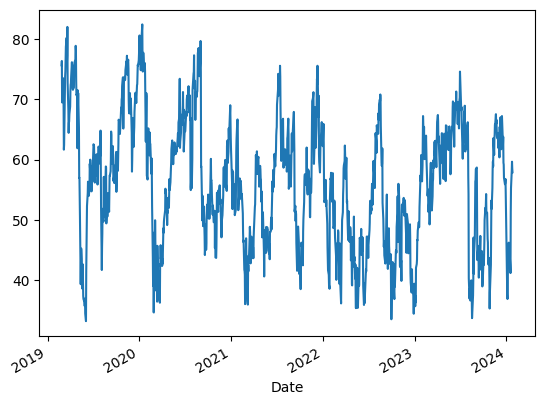

In [13]:
# Calculate features and technical indicators
# Garman-Klass Volatility, RSI, Bollinger Bands, ATR, MACD, Dollar Volume,

df['Garman-Klass'] = ((np.log(df['High'])-np.log(df['Low']))**2)/2-(2*np.log(2)-1)*((np.log(df['Adj Close'])-np.log(df['Open']))**2)

df['RSI'] = df.groupby(level=1)['Adj Close'].transform(lambda x: ta.rsi(close=x, length=20))


df.xs('AAPL', level=1)['RSI'].plot()
